# 12. Support Vector Regression

[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/rhennig/EMA6938/blob/main/Notebooks/12.SupportVectorRegression.ipynb)

Based on https://github.com/tomsharp/SVR/blob/master/SVR.ipynb.

- SVR minimizes the $L_2$ norm of the coefficient vector, not the squared error.

- The error term is instead handled in the constraints, where we set the absolute error less than or equal to a specified maximum error, $\epsilon$.

- For any data point that falls outside of $\epsilon$, we can denote its deviation from the margin by a slack variable $\xi$:
$$
| y_i - {\bf x}_i \beta | \le \epsilon + |\xi_i|
$$

- We minimize the $L_2$ norm of the coefficient vector and these deviations ising an additional hyperparameter $C$:
$$
\min \frac{1}{2} \| \beta \|^2 + C \sum_{i=1}^n | \xi_i |^2
$$

In [1]:
# Import libraries
import numpy as np
import matplotlib.pyplot as plt
#from sklearn import linear_model
#from sklearn.metrics import mean_squared_error, r2_score

plt.rc('xtick', labelsize=16) 
plt.rc('ytick', labelsize=16)

### Create a noisy linear dataset

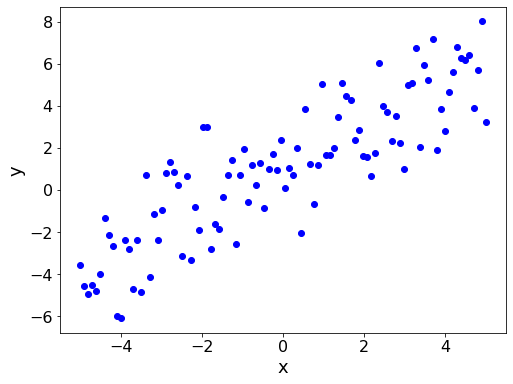

In [2]:
# Initialize random seed
np.random.seed(19)

# Create a linear dataset
Npt = 100
x = np.linspace(-5, 5, Npt, endpoint=True)
#y = x + 1+ (np.random.uniform(-2, 2, Npt))
y = x + 1+ (np.random.normal(0, 2, Npt))

# Create list with 2 points in interval x:[-5,5]
x_pred = np.linspace(-5, 5, 2, endpoint=True)

# Set axes and labels
fig = plt.figure(figsize = (8,6))
ax = fig.add_subplot()
ax.set_xlabel('x', fontsize=18)
ax.set_ylabel('y', fontsize=18)
plt.scatter(x, y, color='blue')
plt.show()

### Linear Regression

Split the dataset into training (80%) and testing (20%) set

In [3]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error 

X = x.reshape(-1,1)
y = y.reshape(-1,1)
X_pred = x_pred.reshape(-1,1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=12)

y_train = y_train.reshape(len(y_train),)
y_test = y_test.reshape(len(y_test),)

lm = LinearRegression()
lm.fit(X_train, y_train)

LinearRegression()

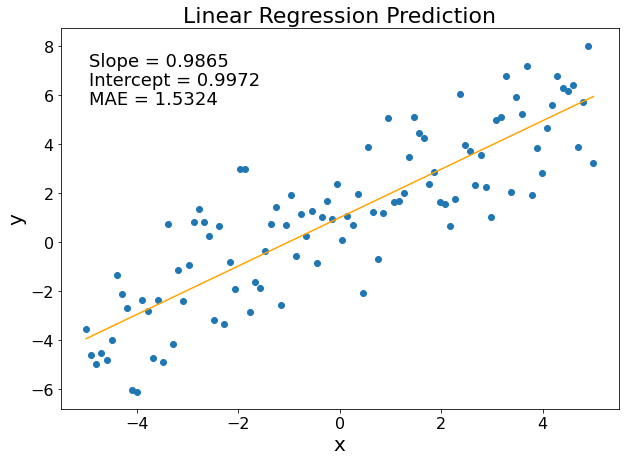

In [4]:
mae = mean_absolute_error(y_test, lm.predict(X_test))

# Plot outputs
plt.figure(figsize=(10,7))
plt.scatter(x, y)
plt.plot(X_pred, lm.predict(X_pred), color='orange')
plt.xlabel('x', fontsize=20)
plt.ylabel('y', fontsize=20)
plt.title('Linear Regression Prediction', fontsize=22)
plt.annotate(u'Slope = %.4f' % lm.coef_[0],  xy=(0.05,0.9), xycoords='axes fraction', fontsize=18)
plt.annotate(u'Intercept = %.4f' % lm.intercept_, xy=(0.05,0.85), xycoords='axes fraction', fontsize=18)
plt.annotate(u'MAE = %.4f' % mae, xy=(0.05,0.8), xycoords='axes fraction', fontsize=18)
plt.show()

### Support Vector Regression

In [10]:
def svr_results(y_test, X_test, fitted_svr_model):
    
    mae = mean_absolute_error(y_test, fitted_svr_model.predict(X_test))
    perc_within_eps = 100*np.sum(np.abs(y_test - fitted_svr_model.predict(X_test)) < eps) / len(y_test)
    
    # Plot outputs
    plt.figure(figsize=(12,8))
    plt.scatter(x, y)
    plt.plot(X_pred, fitted_svr_model.predict(X_pred),     color='orange')
    plt.plot(X_pred, fitted_svr_model.predict(X_pred)+eps, color='red')
    plt.plot(X_pred, fitted_svr_model.predict(X_pred)-eps, color='red')
    plt.xlabel('x', fontsize=20)
    plt.ylabel('y', fontsize=20)
    plt.title('SVR Prediction', fontsize=22)
    plt.annotate(u'Slope = %.4f' % fitted_svr_model.coef_[0],  xy=(0.05,0.9), xycoords='axes fraction', fontsize=18)
    plt.annotate(u'Intercept = %.4f' % fitted_svr_model.intercept_[0], xy=(0.05,0.85), xycoords='axes fraction', fontsize=18)
    plt.annotate(u'MAE = %.4f' % mae, xy=(0.05,0.8), xycoords='axes fraction', fontsize=18)
    plt.annotate(u'Percentage within $\epsilon$ = %.1f' % perc_within_eps, xy=(0.05,0.75), xycoords='axes fraction', fontsize=18)
    plt.annotate(u'$\epsilon$ = %.4f' % eps, xy=(0.65,0.2), xycoords='axes fraction', fontsize=18)
    plt.annotate(u'$C$ = %.4f' % fitted_svr_model.C, xy=(0.65,0.15), xycoords='axes fraction', fontsize=18)
    plt.show()

First, let's use a small hyperparameter $C$ for the constraint on the slack variables.

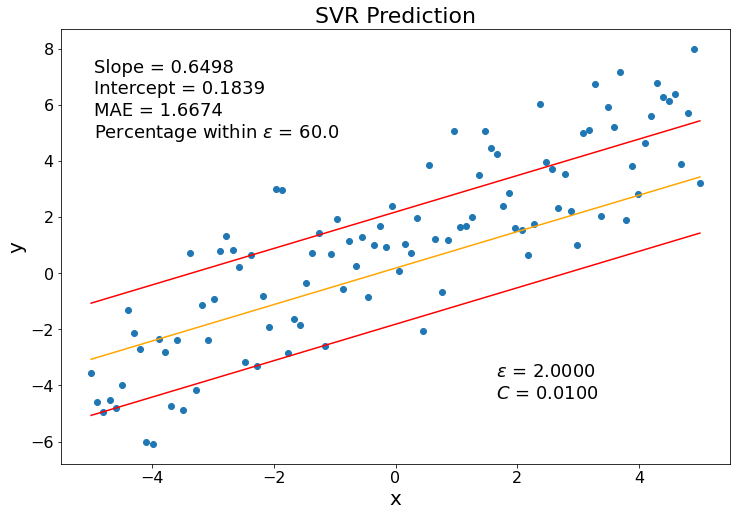

In [11]:
from sklearn.svm import LinearSVR

eps = 2
svr = LinearSVR(epsilon=eps, C=0.01, fit_intercept=True)
svr.fit(X_train, y_train)

svr_results(y_test, X_test, svr)

When we increase $C$, the number of points outside the error margins decreases.

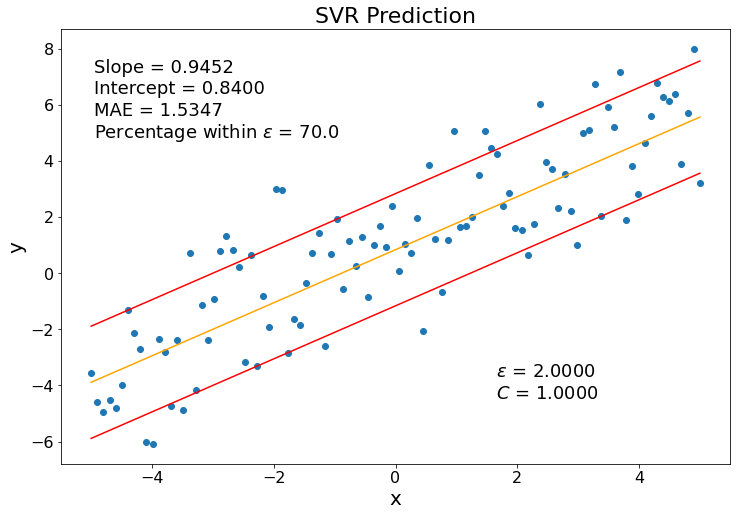

In [12]:
from sklearn.svm import LinearSVR

eps = 2
svr = LinearSVR(epsilon=eps, C=1, fit_intercept=True)
svr.fit(X_train, y_train)

svr_results(y_test, X_test, svr)

We vary the hyperparameter $C$ to obtain an optimal value minimizing the deviations.

In [13]:
test_mae_list = []
perc_within_eps_list = []

eps = 2
c_space = np.linspace(0.01, 1, 100)

for c in c_space:
    varied_svr = LinearSVR(epsilon=eps, C=c, fit_intercept=True, max_iter=10000)
    
    varied_svr.fit(X_train, y_train)

    test_mae = mean_absolute_error(y_test, varied_svr.predict(X_test))
    test_mae_list.append(test_mae)
    
    perc_within_eps = 100*np.sum(abs(y_test-varied_svr.predict(X_test)) <= eps) / len(y_test)
    perc_within_eps_list.append(perc_within_eps)

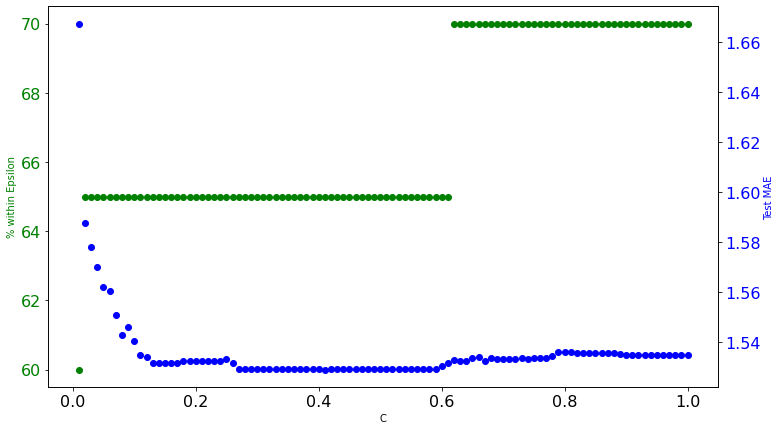

In [14]:
fig, ax1 = plt.subplots(figsize=(12,7))

color='green'
ax1.set_xlabel('C')
ax1.set_ylabel('% within Epsilon', color=color)
ax1.scatter(c_space, perc_within_eps_list, color=color)
ax1.tick_params(axis='y', labelcolor=color)

color='blue'
ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis
ax2.set_ylabel('Test MAE', color=color)  # we already handled the x-label with ax1
ax2.scatter(c_space, test_mae_list, color=color)
ax2.tick_params(axis='y', labelcolor=color)

plt.show()

Here, the resulting model closely matches linear regression. SVR becomes very powerful for large datasets and when using a kernel instead of linear regression.

**Compared to KRR, SVR learns a sparse model and becomes faster for large datasets.**